In [9]:
from scipy.interpolate import griddata, LinearNDInterpolator

In [227]:
import numpy as np

x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
xx, yy = np.meshgrid(x,y)

p = np.random.rand(1000, 2)

In [220]:
import numpy as np

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


In [228]:
values = func(p[:,0], p[:,1])

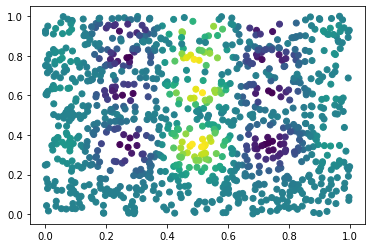

In [229]:
plt.scatter(p[:,0], p[:,1], c=values)

In [231]:
res = grid(p, values, (xx.reshape(-1), yy.reshape(-1)))

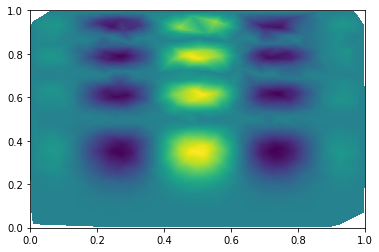

In [233]:
plt.pcolormesh(x, y, res.reshape(1000,1000))

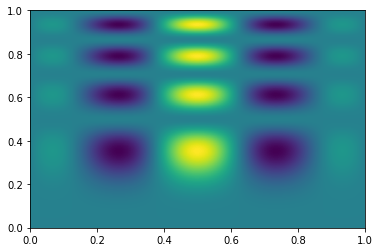

In [222]:
plt.pcolormesh(x, y, func(xx,yy))

In [234]:
resgrid = griddata(p, values, (xx.reshape(-1), yy.reshape(-1)))

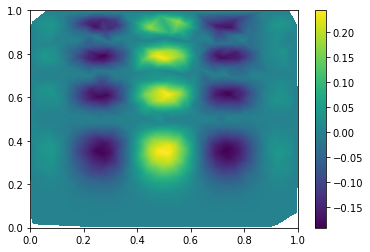

In [243]:
plt.pcolormesh(x, y, resgrid.reshape(1000,1000))
plt.colorbar()

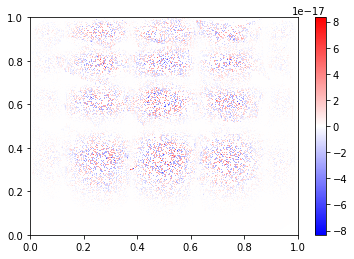

In [241]:
plt.pcolormesh(x, y, resgrid.reshape(1000,1000)-res.reshape(1000,1000), cmap='bwr')
plt.colorbar()

In [121]:
values = interp.values
ndim = xi.shape[1]
nvalues = values.shape[1]
out = np.zeros((xi.shape[0], values.shape[1]),
                       dtype=values.dtype)
simplex_indices = interp.tri.find_simplex(xi)
for i in range(xi.shape[0]):

    # 1) Find the simplex

    isimplex = simplex_indices[i]

    # 2) Linear barycentric interpolation

    if isimplex == -1:
        # don't extrapolate
        for k in range(nvalues):
            out[i,k] = np.nan
        continue
values.shape
    for k in range(nvalues):
        out[i,k] = 0

    ci = interp.tri.transform[isimplex, :ndim,:ndim]@(xi[i] - interp.tri.transform[isimplex, ndim, :]) 
    
    for j in range(ndim+1):
        for k in range(nvalues):
            m = interp.tri.simplices[isimplex,j]
            if j<ndim:
                out[i,k] = out[i,k] + ci[j] * values[m,k]
            else:
                out[i,k] = out[i,k] + (1-np.sum(ci)) * values[m,k]

In [230]:
def grid(old_coord, values, new_coord):
    interp = LinearNDInterpolator(old_coord, values)
    xi = np.array(new_coord).T
    c = np.zeros((xi.shape[0], values.shape[0]))
    simplex_indices = interp.tri.find_simplex(xi)
    for n in range(c.shape[0]):
        isimplex = simplex_indices[n]
        if isimplex == -1:
            c[n,:] = np.nan
        else:
            c[n,interp.tri.simplices[isimplex]] = [*(interp.tri.transform[isimplex, :ndim,:ndim]@(xi[n] - interp.tri.transform[isimplex, ndim, :])), 1-(interp.tri.transform[simplex_indices[n], :ndim,:ndim]@(xi[n] - interp.tri.transform[simplex_indices[n], ndim, :])).sum()]
    return c@values

def grid_vjp(g, ans, vs, gvs, x):
    return g@c
    

In [246]:
old_coord, values, new_coord = p, values, (xx.reshape(-1), yy.reshape(-1))

In [254]:
interp = LinearNDInterpolator(old_coord, np.ones((old_coord.shape[0],1)))
xi = np.array(new_coord).T
c = np.zeros((xi.shape[0], values.shape[0]))
simplex_indices = interp.tri.find_simplex(xi)
for n in range(c.shape[0]):
    isimplex = simplex_indices[n]
    if isimplex == -1:
        c[n,:] = np.nan
    else:
        c[n,interp.tri.simplices[isimplex]] = [*(interp.tri.transform[isimplex, :ndim,:ndim]@(xi[n] - interp.tri.transform[isimplex, ndim, :])), 1-(interp.tri.transform[simplex_indices[n], :ndim,:ndim]@(xi[n] - interp.tri.transform[simplex_indices[n], ndim, :])).sum()]

In [252]:
old_coord.shape

(1000, 2)

In [253]:
np.ones((len(old_coord[0]),1))

array([[1.],
       [1.]])

In [256]:
np.array((p[:,0], p[:,1])).shape

(2, 1000)

In [3]:
import numpy as np
a = (np.ones((23,56)), np.zeros((23,56)))

In [4]:
np.array(a).T.shape

(56, 23, 2)